# Test kpoints

In [1]:
import numpy as np
#
from qepy.driver import Driver

In [2]:
qe_options = {
    '&control': {
        'calculation': "'scf'",
        'pseudo_dir': "'./'",
    },
    '&system': {
        'ibrav' : 0,
        'degauss': 0.005,
        'ecutwfc': 30,
        'nat': 1,
        'ntyp': 1,
        'occupations': "'smearing'",
    },
    'atomic_positions crystal': ['Al    0.0  0.0  0.0'],
    'atomic_species': ['Al  26.98 Al.pbe-nl-kjpaw_psl.1.0.0.UPF'],
    'k_points automatic': ['10 10 10 1 1 1'],
    'cell_parameters angstrom':[
        '0.     2.025  2.025',
        '2.025  0.     2.025',
        '2.025  2.025  0.   '],
}

!wget http://pseudopotentials.quantum-espresso.org/upf_files/Al.pbe-nl-kjpaw_psl.1.0.0.UPF

In [3]:
kps = np.arange(2, 12, 2)
energies = []
for kp in kps:
    qe_options['k_points automatic'] = [f'{kp} {kp} {kp} 1 1 1']
    #
    driver = Driver(qe_options=qe_options, logfile=True)
    ene = driver.scf()
    energies.append(ene)
    driver.stop()

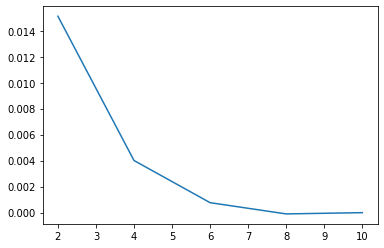

In [4]:
import matplotlib.pyplot as plt

energies=np.asarray(energies)
plt.plot(kps, energies-energies[-1]);